# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
Description of data

In [121]:
# Import libraries
import pandas as pd
import numpy as np

# Read our dataset
df = pd.read_csv('fitness_class_2212.csv')

# Take a look at the first five rows
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [122]:
# Check the information on null values and types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [123]:
# Check for null values in the columns
df.isnull().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [124]:
# Check the unique values of each column
print({'booking_id' : df['booking_id'].nunique()})
print({'months_as_member' : df['months_as_member'].nunique()})
print({'weight' : df['weight'].nunique()})
print({'days_before' : df['days_before'].nunique()})
print({'day_of_week' : df['day_of_week'].nunique()})
print({'time' : df['time'].nunique()})
print({'category' : df['category'].nunique()})
print({'attended' : df['attended'].nunique()})

{'booking_id': 1500}
{'months_as_member': 72}
{'weight': 1241}
{'days_before': 31}
{'day_of_week': 10}
{'time': 2}
{'category': 6}
{'attended': 2}


In [125]:
# Change the dtype of 'booking_id' to str
df['booking_id'] = df['booking_id'].astype(str)
print(df['booking_id'].dtype)

object


In [126]:
# Calculate the mean of the 'weight' column
overall_average_weight = df['weight'].mean()

# Round the mean to two decimal places
overall_average_weight = round(overall_average_weight, 2)
print(overall_average_weight)

# Fill the missing values with the rounded mean
df['weight'].fillna(overall_average_weight, inplace=True)

82.61


In [127]:
# Convert 'days_before' column to integer
df['days_before'] = df['days_before'].astype(str).str.extract('(\d+)').astype(int)

print(df['days_before'].dtype)

int64


In [128]:
# Map the full names of weekdays to abbreviated forms
day_map = {
    'Monday': 'Mon',
    'Tuesday' : 'Tue',
    'Wednesday' : 'Wed',
    'Thursday' : 'Thu',
    'Friday' : 'Fri',
    'Saturday' : 'Sat',
    'Sunday' : 'Sun'
}

# Apply the map to the 'day_of_week' column
df['day_of_week'] = df['day_of_week'].map(day_map).fillna(df['day_of_week'])

# Remove periods in the end
df['day_of_week'] = df['day_of_week'].str.replace(r'\.$', '', regex=True)

In [129]:
# Replace the '-' we found in the 'category' column
df['category'] = df['category'].replace("-", np.nan)

In [130]:
# Check for null values
df['category'].isnull().sum()

13

In [131]:
# Fill null values of 'category'column with 'unknown'
df['category'] = df['category'].fillna('unknown')

In [132]:
# Check again for null values
df['category'].isnull().sum()

0

In [133]:
df.describe()

,months_as_member,weight,days_before,attended
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,15.628667,82.610373,8.346667,0.302667
std,12.926543,12.680411,4.077938,0.459565
min,1.000000,55.410000,1.000000,0.000000
25%,8.000000,73.562500,4.000000,0.000000
50%,12.000000,81.035000,9.000000,0.000000
75%,19.000000,89.382500,12.000000,1.000000
max,148.000000,170.520000,29.000000,1.000000


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   object 
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   int64  
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


The dataset contains 1500 rows and 8 columns with missing values before cleaning:
- **booking_id**: The booking_id column appears to contain 1500 unique identifiers.There are no missing values. It is currently an (int64) dtype. However, it is a unique identifier and does not contain any numeric values. Therefore, it could be changed to a (str) dtype. After that it matches the description.  
- **months_as_member:** The months_as_member column contains discrete values representing the number of months as fitness club members, and the are 72 unique values. There are no missing values. No action is needed. It maches the description.    
- **weight:** The weight column contains continuous values representing the member's weight in kg, and the values are within the expected range. There are 1241 unique values in this column. There are missing 20 values. To address the missing values, we calculate the overall average weight (82.61) and then replace the missing values with this average. After these steps, it matches the description.
- **days_before:** Initially, the "days_before" column was of object data type. There were 31 unique values. To match the description, the following steps were performed:
    - Convert the "days_before" column to strings to handle variations in the data.
    - Extract the numeric part from the strings.
    - Convert the extracted values to integers. After these steps, the "days_before" column was transformed into discrete data, representing the number of days before the class with minimum value of 1 day. No missing values were found.
- **day_of_week:** The "day_of_week" column should be nominal and represent the day of the week of the class, with acceptable values being "Mon," "Tue," "Wed," "Thu," "Fri," "Sat," or "Sun." Initially, the "day_of_week" column contained 10 unique values with variations in day names, including both abbreviated and full day names. To standardize the values, the following steps were performed:
    - Define a dictionary day_map that maps full names of weekdays to their abbreviated forms.
    - Apply the mapping using the map method, converting full day names to their abbreviated forms.
    - Remove the periods in the end of some values. After applying these steps, the "day_of_week" column contains consistent abbreviated day names and matches the expectations of being nominal. Any full day names have been converted to their abbreviated forms. No missing values were found. After these steps, it matches the description.
- **time:** The time column contains 2 unique ordinal values representing the time of day of the class ("AM" or "PM"), as expected from the description. No missing values were found. No action is needed. 
- **category:** Initially, the "category" column contained 6 unique values, with dashes ("-") that needed to be handled. To handle the dashes and the resulting missing values, the following steps were performed:
    - Replace dashes ("-") with NaN in the "category" column.
    - Fill the 13 null values in the "category" column with "unknown". After applying these steps, the "category" column contains nominal values representing the category of the fitness class, dashes have been replaced with NaN, and any null values have been replaced with "unknown". By following this process, we have ensured that the "category" column matches the specified criteria and expectations.
- **attended:** The attended column contains 2 unique nominal values (0 or 1) representing whether the member attended the class, as expected from the description. No missing values were found. No action is needed.

After these steps the unique values of the columns are:

In [135]:
# Check the unique values of each column
print({'booking_id' : df['booking_id'].nunique()})
print({'months_as_member' : df['months_as_member'].nunique()})
print({'weight' : df['weight'].nunique()})
print({'days_before' : df['days_before'].nunique()})
print({'day_of_week' : df['day_of_week'].nunique()})
print({'time' : df['time'].nunique()})
print({'category' : df['category'].nunique()})
print({'attended' : df['attended'].nunique()})

{'booking_id': 1500}
{'months_as_member': 72}
{'weight': 1241}
{'days_before': 19}
{'day_of_week': 7}
{'time': 2}
{'category': 6}
{'attended': 2}


## Task 2
Visualization of Bookings

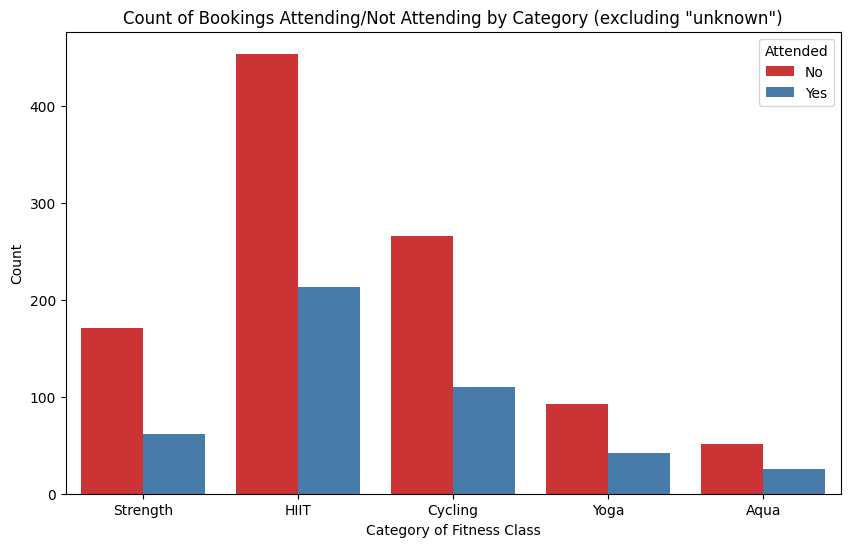

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with 'unknown' category
df_filtered = df[df['category'] != 'unknown']

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='category', hue='attended', palette='Set1')
plt.xlabel('Category of Fitness Class')
plt.ylabel('Count')
plt.title('Count of Bookings Attending/Not Attending by Category (excluding "unknown")')
plt.legend(title='Attended', labels=['No', 'Yes'])
plt.show()

In the plot we excluded "unknown" category which represents missing values in the 'category' column.
- a. The "HIIT" category has the most observations attending.
- b. The  observations are balanced across categories of the variable attended as seen in the plot above and we can support this further below.

In [137]:
# Calculate the percentage of attended in each category
category_counts = df_filtered.groupby(['attended', 'category']).size()
attended_counts = category_counts.loc[1]
total_counts = category_counts.groupby(level=1).sum()
attended_percentage = (attended_counts / total_counts) * 100

# Display the results
print("Percentage of Attended in Each Category (excluding 'unknown'):")
print(round(attended_percentage, 2))

Percentage of Attended in Each Category (excluding 'unknown'):
category
Aqua        32.89
Cycling     29.26
HIIT        31.93
Strength    26.61
Yoga        31.11
dtype: float64


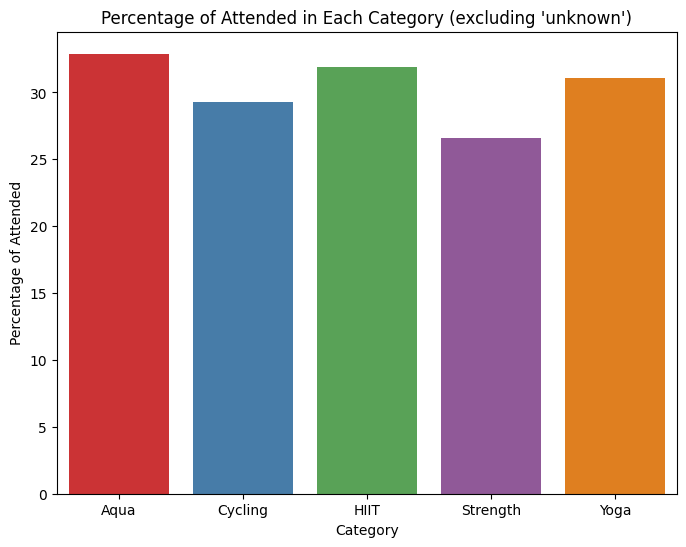

In [138]:
# Create a DataFrame for plotting
data = pd.DataFrame({'category': attended_percentage.index, 'Percentage of Attended': attended_percentage.values})

# Plot the percentage of attended in each category (excluding 'unknown')
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='category', y='Percentage of Attended', palette='Set1')
plt.title("Percentage of Attended in Each Category (excluding 'unknown')")
plt.xlabel("Category")
plt.ylabel("Percentage of Attended")
plt.show()

We can observe that the variable attended is indeed quite balanced across the categories.

## Task 3
Distribution Months as a Member

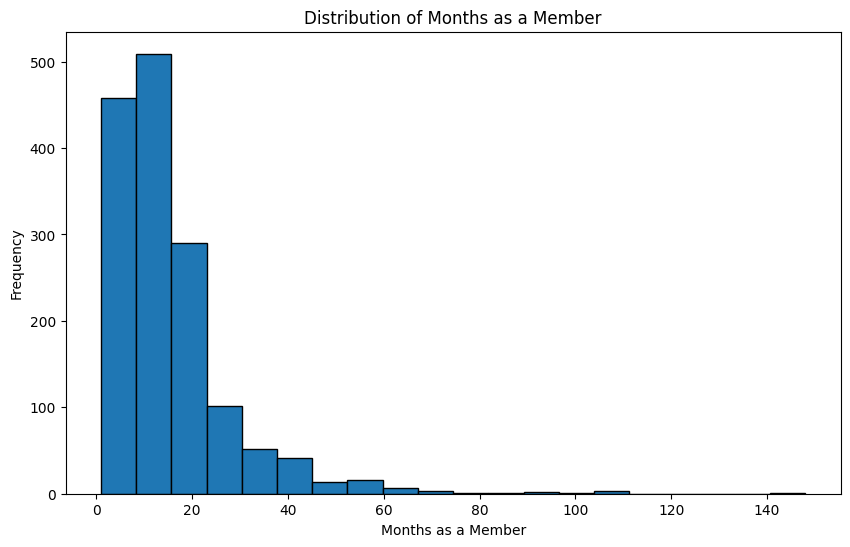

In [139]:
# Create a histogram of 'months_as_member'
plt.figure(figsize=(10, 6))
plt.hist(df['months_as_member'], bins=20, edgecolor='k')
plt.xlabel('Months as a Member')
plt.ylabel('Frequency')
plt.title('Distribution of Months as a Member')
plt.show()

In [140]:
# Summary statistics for 'months_as_member'
summary_stats = df['months_as_member'].describe()
print(summary_stats)

count    1500.000000
mean       15.628667
std        12.926543
min         1.000000
25%         8.000000
50%        12.000000
75%        19.000000
max       148.000000
Name: months_as_member, dtype: float64


The distribution of the number of months as a member is right-skewed, as indicated by the summary statistics and the visualization with a concentration of members towards the lower end of the duration scale (few months) and a long tail extending to the right, indicating some members with much longer durations.

- Mean: The mean number of months as a member is approximately 15.63 months, indicating that, on average, members have been with the fitness club for around 15.63 months.

- Standard Deviation: The standard deviation is approximately 12.93 months, which represents the spread or dispersion of the data points around the mean. It indicates that the membership durations vary considerably from the mean.

- Minimum: The minimum membership duration is 1 month, suggesting that some members have recently joined the club.

- 25th Percentile: The 25th percentile value is 8 months, which means that 25% of members have been with the club for 8 months or less.

- Median: The median is 12 months, indicating that 50% of members have a membership duration of 12 months or less.

- 75th Percentile: The 75th percentile value is 19 months, meaning that 75% of members have been with the club for 19 months or less.

- Maximum: The maximum membership duration is 148 months, indicating a few long-term members who have been with the club for a substantial period.

We can further visualize the spread and distribution of membership durations, identify potential outliers, and understand the central tendency of the data with the help of a boxplot.

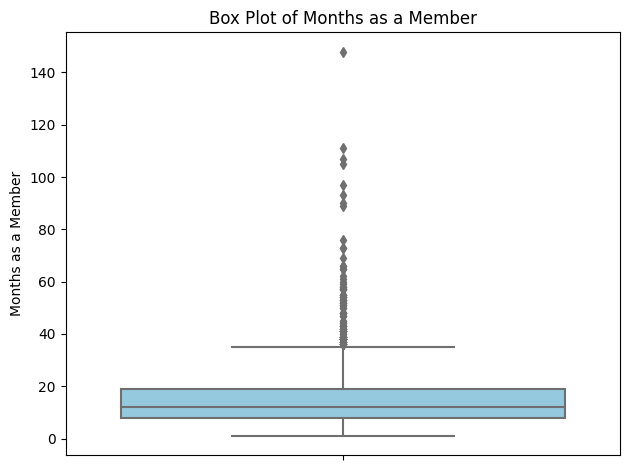

In [141]:
# Plot the box plot
sns.boxplot(data=df, y='months_as_member', color='skyblue')
plt.ylabel('Months as a Member')
plt.title('Box Plot of Months as a Member')
plt.tight_layout()
plt.show() 

Median (Q2): The horizontal line inside the box represents the median value, which is approximately 12 months. This means that 50% of the data points have a membership duration of 12 months or less.

Box (IQR): The box itself represents the interquartile range (IQR), which spans from the 25th percentile (Q1) to the 75th percentile (Q3). The IQR provides a measure of the spread of the middle 50% of the data. In this box plot, the IQR spans from about 8 months to 19 months.

Whiskers: The lines extending from the box (whiskers) indicate the range of the data, excluding potential outliers. The whisker on the lower end extends to the minimum value in the data (approximately 1 month), and the whisker on the upper end extends to the maximum value within the range of "normal" data points (approximately 35 months).

Outliers: In this box plot, there are several individual data points plotted above the upper whisker, indicating the presence of outliers with membership durations significantly longer than the majority of the data points.

Key Observations:

The distribution is right-skewed, as indicated by the longer whisker on the upper end of the box plot and the presence of outliers on the high end of the scale.

The majority of the data falls within the IQR (from approximately 8 months to 19 months), with the median value at 12 months.

There are outliers on the upper end of the scale, with membership durations extending up to approximately 35 months. These outliers represent individuals with exceptionally long membership durations.

There are no outliers on the lower end, suggesting that there are no exceptionally short membership durations in the dataset.

## Task 4
Attendance vs. Number of Months as a Member

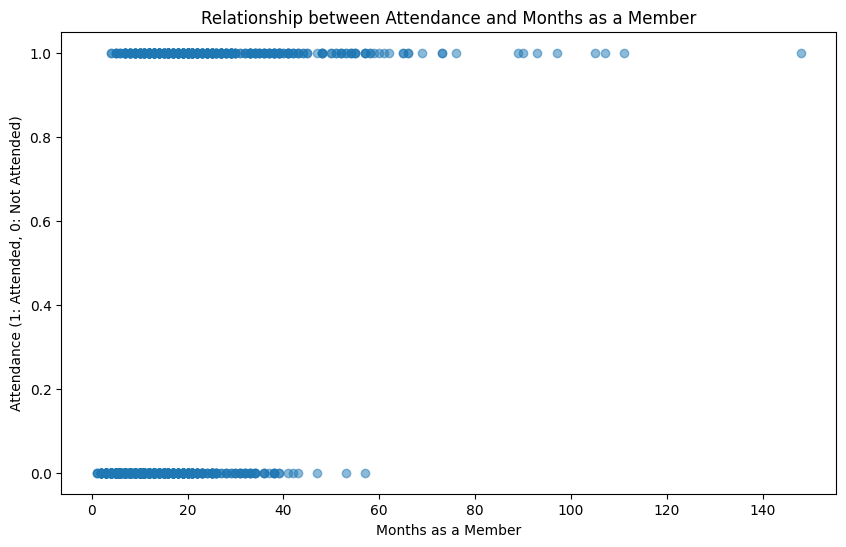

In [142]:
# Create a scatter plot of 'months_as_member' vs. 'attended'
plt.figure(figsize=(10, 6))
plt.scatter(df['months_as_member'], df['attended'], alpha=0.5)
plt.xlabel('Months as a Member')
plt.ylabel('Attendance (1: Attended, 0: Not Attended)')
plt.title('Relationship between Attendance and Months as a Member')
plt.show()

The scatter plot suggests a positive correlation between the duration of membership (months as a member) and attendance. Attendance rates tend to increase as members stay longer in the program, with the highest attendance rates observed among long-term members.

To see better this relationship we should do some feature engineering and create a new column with months in ranges and the plot the proportion of attended for each group.

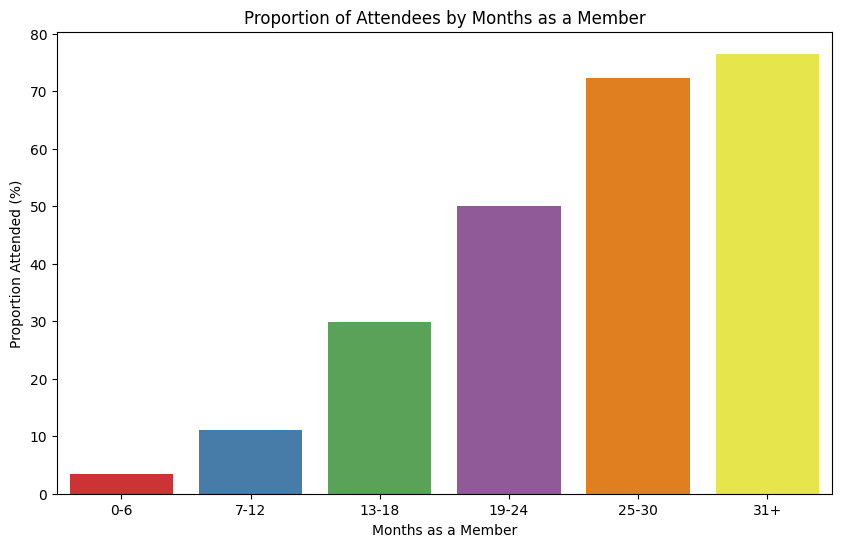

In [143]:
# Create a new column 'months_group' to categorize months into ranges
df['months_group'] = pd.cut(df['months_as_member'], bins=[0, 6, 12, 18, 24, 30, float('inf')],
                            labels=['0-6', '7-12', '13-18', '19-24', '25-30', '31+'], right=False)

# Create a pivot table to calculate the proportion of attendees in each months group
pivot_table = df.pivot_table(index='months_group', columns='attended', values='booking_id', aggfunc='count', fill_value=0)
pivot_table['Total'] = pivot_table[0] + pivot_table[1]
pivot_table['Proportion Attended'] = pivot_table[1] / pivot_table['Total'] * 100

# Create a bar plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_table, x=pivot_table.index, y='Proportion Attended', palette='Set1')
plt.xlabel('Months as a Member')
plt.ylabel('Proportion Attended (%)')
plt.title('Proportion of Attendees by Months as a Member')
plt.show()

The plot above shows a clear trend: as the number of months as a member increases, the proportion of attendees generally tends to rise significantly. The highest attendance rates are observed among members who have been with the program for longer periods, suggesting a positive correlation between the duration of membership and attendance.

## Task 5
Type of machine learning problem

The business problem of predicting whether members will attend fitness classes based on the provided data is a classification problem.

In a classification problem, the goal is to assign a label or category (in this case, "attend" or "not attend") to each data point based on its features (in this case, the member's information such as months as a member, weight, days before the class, etc.). The outcome variable ("attended") is categorical, consisting of two classes: attended (1) or not attended (0).

The objective is to build a predictive model that can classify or categorize new data points (members) into one of these two classes, indicating whether they are likely to attend a class or not. Classification algorithms, such as logistic regression, decision trees, random forests, or support vector machines, can be used to address this type of problem.

The model's performance can be evaluated using classification metrics like accuracy, precision, recall, F1-score, and ROC curves, etc.

## Task 6
Fit a baseline model

Our baseline model for predicting whether members will attend fitness classes using the provided data, will be a simple logistic regression model. We will load the dataset into two variables: X for the features ('months_as_member', 'weight', 'days_before', 'day_of_week', 'time', 'category') and y for the target variable (attended). Then perform one-hot encoding on the categorical features (day_of_week, time, category),  split the data and fit the logistic regression model.

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['months_as_member', 'weight', 'days_before', 'day_of_week', 'time', 'category']]
y = df['attended']

# Convert categorical features to dummy variables (one-hot encoding)
X = pd.get_dummies(X, columns=['day_of_week', 'time', 'category'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model1 = LogisticRegression(random_state=42)
model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model1.predict(X_test)

## Task 7
Fit a comparison model

The comparison model for predicting whether members will attend fitness classes using the provided data, will be a Random Forest classifier. Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive accuracy and reduce overfitting.

In [145]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the Random Forest model
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model2.predict(X_test)

## Task 8
Why we chose the two models

1. Logistic Regression (Baseline Model):

	- Simplicity and Interpretability: Logistic regression is a simple and interpretable classification algorithm that serves as a good starting point for many classification tasks. Its coefficients provide insights into the relationship between features and the likelihood of attendance.
	- Baseline Comparison: Logistic regression serves as a useful baseline model against which other, more complex models can be compared. Starting with a straightforward model helps establish a benchmark for model performance.
	- Feature Importance: Logistic regression can highlight the importance of individual features in predicting attendance, which can be valuable for understanding the factors that influence member attendance.

2. Random Forest (Comparison Model):

	- Ensemble Learning: Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive accuracy. It is known for its robustness and ability to handle complex relationships in the data.
	- Non-Linearity: Unlike logistic regression, Random Forest can capture non-linear relationships between features and the target variable. 
	- Feature Importance: Random Forest provides a measure of feature importance, allowing us to identify which features have the most impact on attendance.

3. Model Comparison: Comparing Random Forest to logistic regression helps assess whether a more complex model offers significant improvements in predictive performance for this specific task. By using both models, we can evaluate how well each performs in predicting attendance and gain insights into the importance of various features.

## Task 9
Performance comparison

In [146]:
# Logistic Regression
# Evaluate the baseline model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display baseline model performance metrics
print(f"Logistic Regression Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix (Logistic Regression):")
print(confusion)
print("\nClassification Report (Logistic Regression):")
print(classification_rep)

Logistic Regression Model Accuracy: 0.77

Confusion Matrix (Logistic Regression):
[[186  11]
 [ 59  44]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       197
           1       0.80      0.43      0.56       103

    accuracy                           0.77       300
   macro avg       0.78      0.69      0.70       300
weighted avg       0.77      0.77      0.74       300



In [147]:
# Random Forest
# Evaluate the comparison model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display comparison model performance metrics
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}")
print("\nConfusion Matrix (Random Forest):")
print(confusion_rf)
print("\nClassification Report (Random Forest):")
print(classification_rep_rf)

Random Forest Model Accuracy: 0.75

Confusion Matrix (Random Forest):
[[174  23]
 [ 53  50]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       197
           1       0.68      0.49      0.57       103

    accuracy                           0.75       300
   macro avg       0.73      0.68      0.69       300
weighted avg       0.74      0.75      0.73       300



In [148]:
from sklearn.metrics import roc_auc_score

# Calculate ROC-AUC score for Logistic Regression
roc_auc_logistic = roc_auc_score(y_test, model1.predict_proba(X_test)[:, 1])

# Calculate ROC-AUC score for Random Forest
roc_auc_rf = roc_auc_score(y_test, model2.predict_proba(X_test)[:, 1])

print(f"ROC-AUC Score (Logistic Regression): {roc_auc_logistic:.2f}")
print(f"ROC-AUC Score (Random Forest): {roc_auc_rf:.2f}")

ROC-AUC Score (Logistic Regression): 0.81
ROC-AUC Score (Random Forest): 0.78


## Task 10
Which model and why?

- Logistic Regression Model:

    - Accuracy: 0.77
    - ROC-AUC Score: 0.81
    - Precision: 0.80
    - Recall: 0.43
    - F1-score: 0.56

- Random Forest Model:

    - Accuracy: 0.75
    - ROC-AUC Score: 0.78
    - Precision: 0.68
    - Recall: 0.49
    - F1-score: 0.57


- Accuracy: The Logistic Regression model has a higher accuracy (0.77) compared to the Random Forest model (0.75). It correctly classifies a higher percentage of instances overall.

- ROC-AUC Score: The Logistic Regression model has a higher ROC-AUC score (0.81) compared to the Random Forest model (0.78). A higher ROC-AUC score indicates better discrimination ability in distinguishing between positive and negative cases. This suggests that the Logistic Regression model has a better ability to rank the instances correctly.

- Precision: Precision measures the ability of a model to make correct positive predictions. The Logistic Regression model has higher precision (0.80) compared to the Random Forest model (0.68). This means that when the Logistic Regression model predicts attendance (attended = 1), it is more likely to be correct.

- Recall: Recall measures the ability of a model to capture all positive instances. The Random Forest model has slightly higher recall (0.49) compared to the Logistic Regression model (0.43). This suggests that the Random Forest model is better at identifying actual attendance cases.

- F1-score: The F1-score is the harmonic mean of precision and recall. The Random Forest model has a higher F1-score (0.57) compared to the Logistic Regression model (0.56), but the difference is marginal.

Conclusion:

- Based on accuracy and ROC-AUC score, the Logistic Regression model outperforms the Random Forest model.

- In terms of precision, the Logistic Regression model has a higher value, indicating a better ability to make correct positive predictions.

- In terms of recall, the Random Forest model has a slightly higher value, indicating a better ability to capture actual attendance cases.

- The F1-scores are comparable between the two models, with the Random Forest model having a slightly higher F1-score.

The choice between the two models depends on the specific business objectives and the trade-off between precision and recall. If precision is more critical, the Logistic Regression model may be preferred. If capturing more true positives (higher recall) is essential, the Random Forest model may be preferred.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam